In [2]:
#Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data from CSV file
data = pd.read_excel('churn.xlsx')

In [4]:
# Function to clean column names

def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df

In [5]:
# Check for null values
data.isna().any(axis=0).any()

False

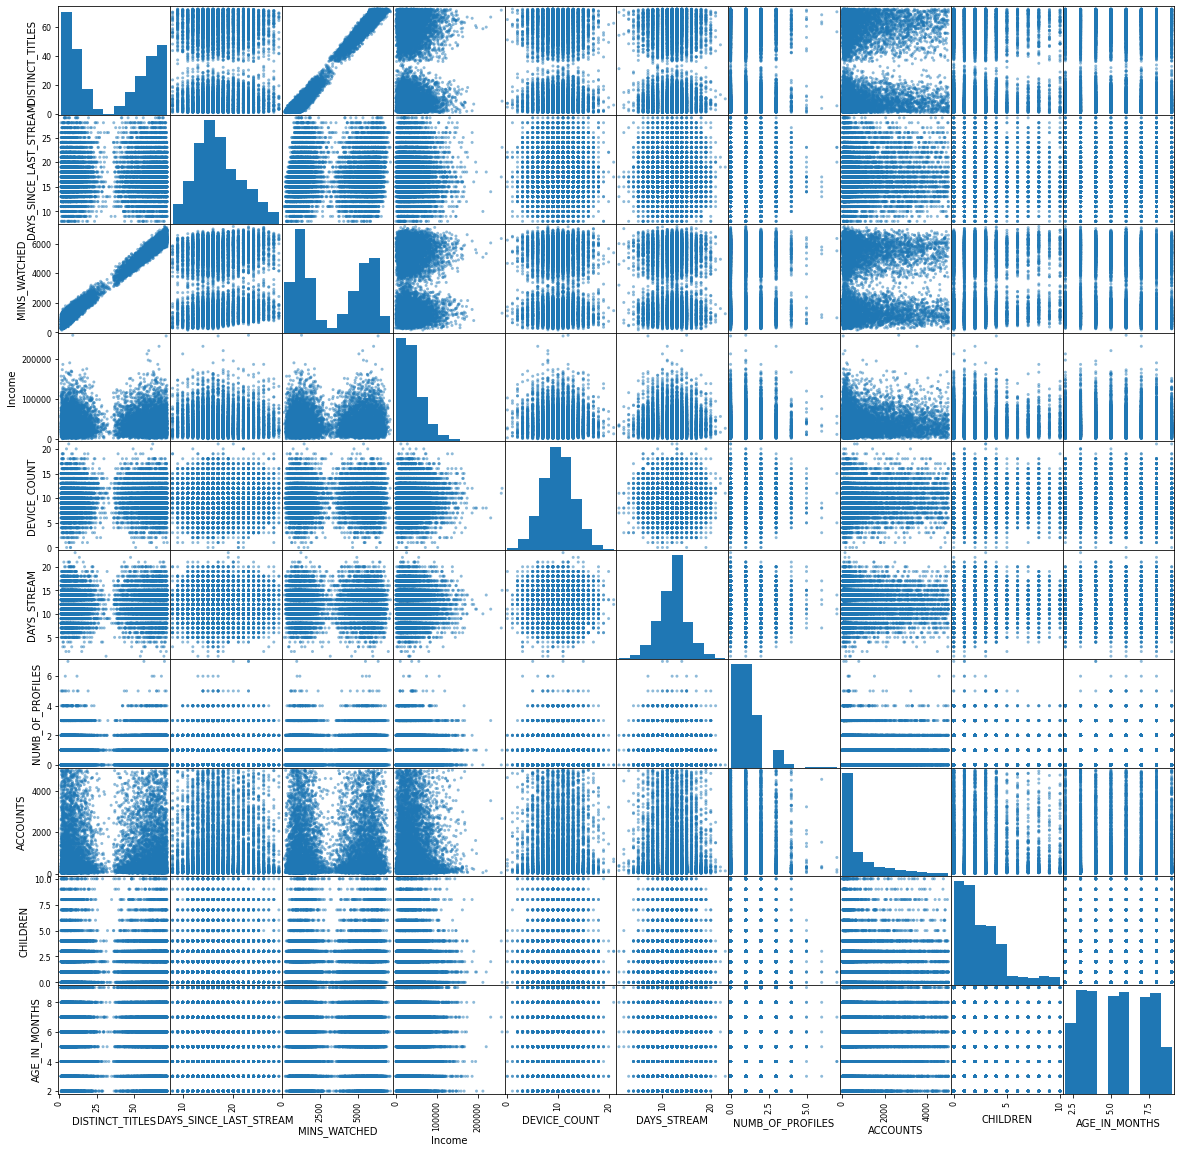

In [7]:
pd.plotting.scatter_matrix(data[['DISTINCT_TITLES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED','Income','DEVICE_COUNT',
           'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']], figsize=(20, 20))
plt.show()

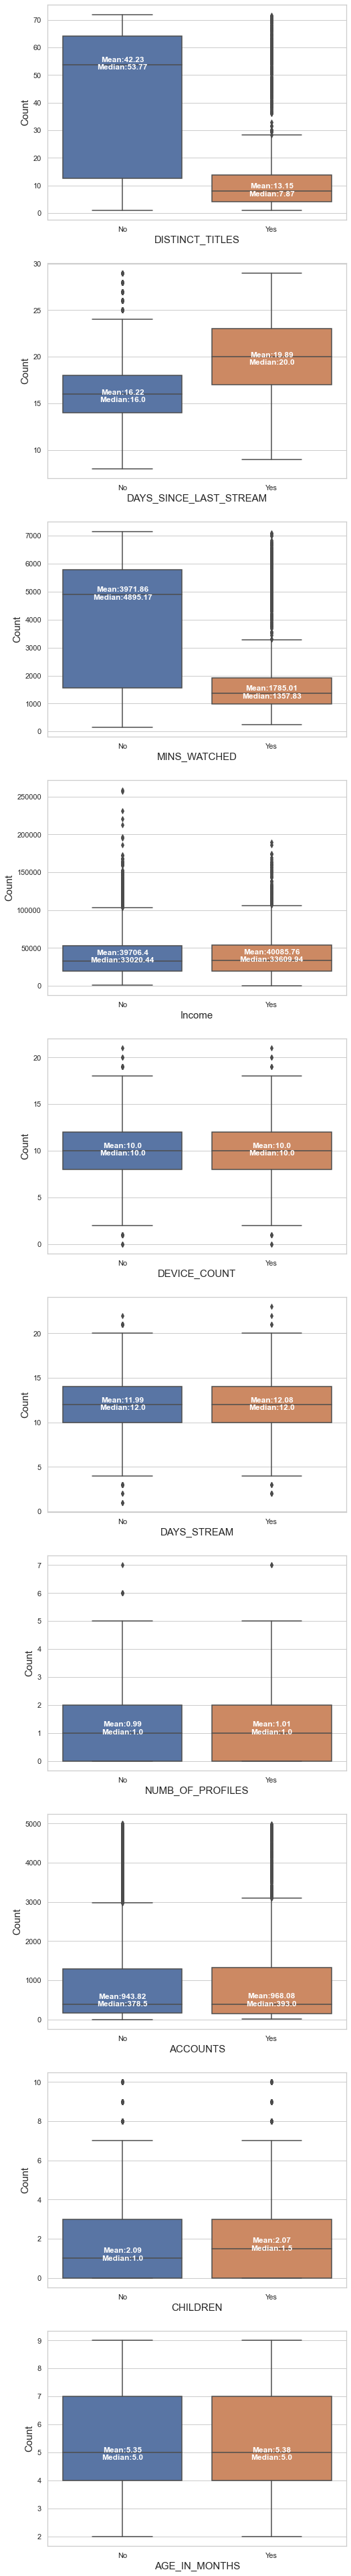

In [8]:
# Declaring all the columns which will be used for creation of box plots

to_plot = ['DISTINCT_TITLES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED','Income','DEVICE_COUNT',
           'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']

# Creating box plots, with mean and median printed
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (8,7*len(to_plot)))
i = 0
for x in to_plot:
    g = sns.boxplot(x='CHURN',y=x,data=data, ax=axes[i])
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Count",fontsize=15)
    i += 1
    means = data.groupby('CHURN')[x].mean()
    medians = data.groupby('CHURN')[x].median()
    vertical_offset = data[x].mean() *.05
    for xtick in g.get_xticks():
        g.text(xtick,medians[xtick]-vertical_offset,"Mean:"+str(round(means[xtick],2))+'\n'+"Median:"+str(round(medians[xtick],2)), horizontalalignment='center', color='w', weight='semibold')


plt.show(fig)

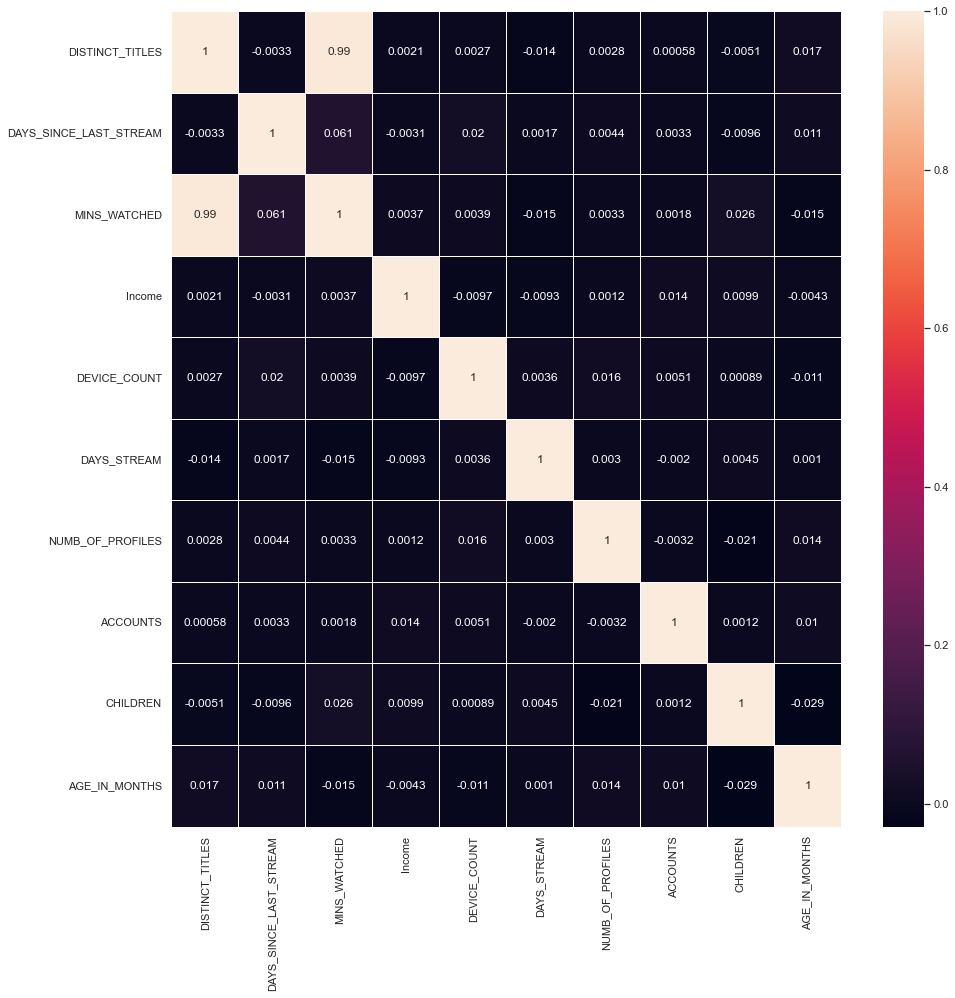

In [10]:
plt.subplots(figsize=(15,15))
df = data[['DISTINCT_TITLES','DAYS_SINCE_LAST_STREAM','MINS_WATCHED','Income','DEVICE_COUNT',
           'DAYS_STREAM','NUMB_OF_PROFILES','ACCOUNTS','CHILDREN','AGE_IN_MONTHS']]
sns.heatmap(df.corr(),annot=True,lw=1);

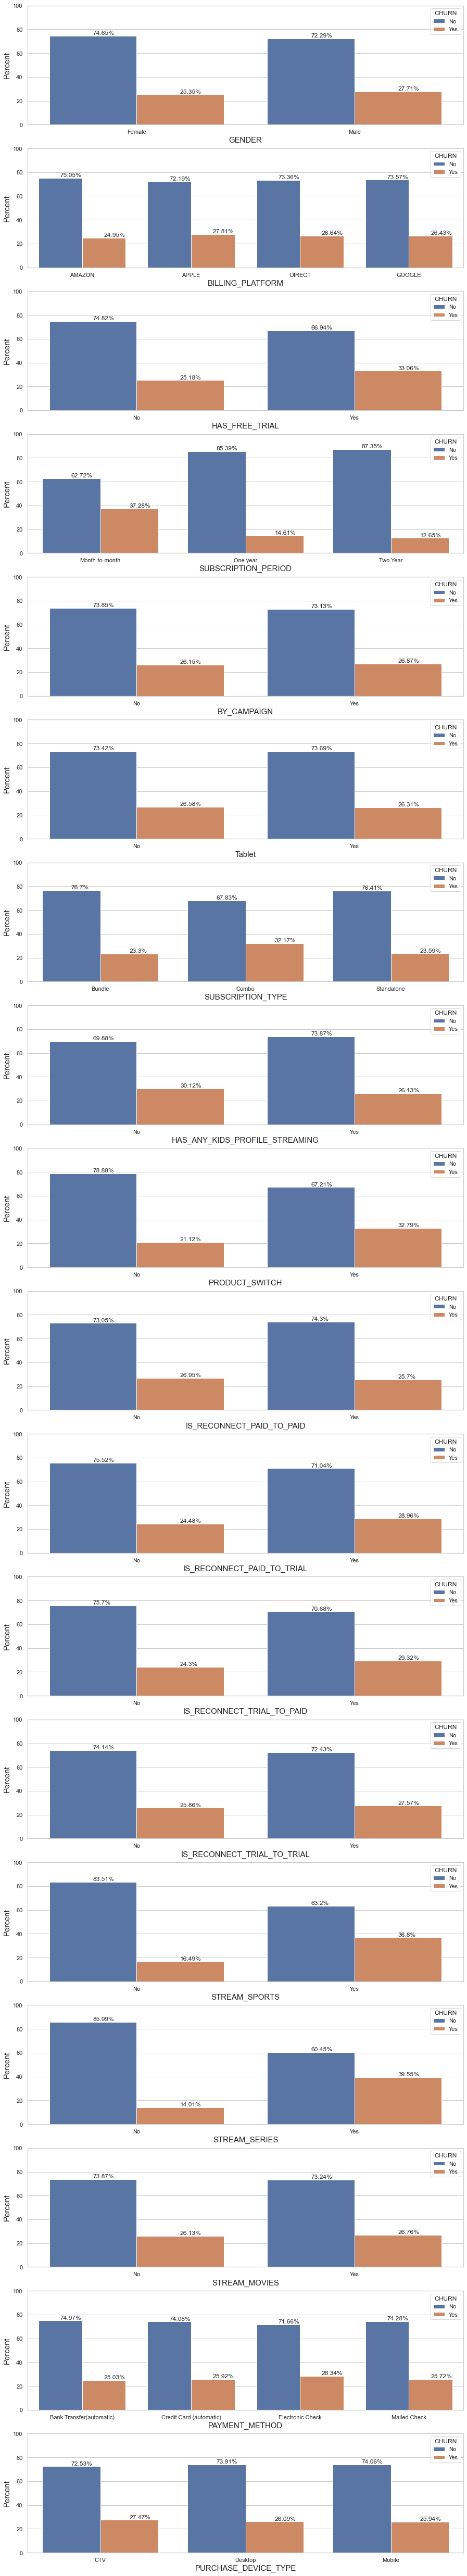

In [9]:
# Declaring all the columns which will be used for creation of box plots

to_plot = ['GENDER','BILLING_PLATFORM','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','BY_CAMPAIGN',
           'Tablet','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING','PRODUCT_SWITCH','IS_RECONNECT_PAID_TO_PAID','IS_RECONNECT_PAID_TO_TRIAL',
           'IS_RECONNECT_TRIAL_TO_PAID','IS_RECONNECT_TRIAL_TO_TRIAL','STREAM_SPORTS','STREAM_SERIES',
           'STREAM_MOVIES','PAYMENT_METHOD','PURCHASE_DEVICE_TYPE']

# Creating bar charts, with percentages printed
sns.set(style="whitegrid", color_codes=True)
fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (15,5*len(to_plot)))
i = 0
for x in to_plot:
    d = data.groupby(x)['CHURN'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    g = sns.barplot(x=x,y='Percentage',hue='CHURN', data=d, ax=axes[i])     # Create bar chart
    g.set_ylim(0,100)
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Percent",fontsize=15)
    i += 1
    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height()
        g.text(txt_x,txt_y+1,txt)        # Printing percentages on the bars


plt.show(fig)
